In [5]:
from math import floor

def symmetric(start,end,perm):
    if (end-start)%2 == 0:
        while start < end:
            if perm[start] != perm[end]: return False
            start += 1
            end -= 1
    else:
        while start <= end:
            if perm[start] != perm[end]: return False
            start += 1
            end -= 1
    return True

def from_left(perm):
    val = 0
    start = 0
    profile = []

    while start < len(perm):
        reach = len(perm)-1
        while reach >=0 and not symmetric(start,reach,perm):
            reach -= 1
        profile.append(reach-start+1)
        val += 1
        start = reach+1

    return val, profile
    
def base_to_list(value, length, base):
    num_digits = length
    rep = []
    for _ in range(length):
        rep.append(value % base)
        value = value // base
    return rep

def max_profile(n, base=2):
    lst = []
    freq_dict = {}
    max = 0
    for i in range(base**n): 
        seq = base_to_list(i,n,base)
        if seq[0] == 0:
            val_temp = from_left(seq)
            val = val_temp[0]
            profile = val_temp[1]
            if val == floor((3*n+10)/7):
                print(f'{seq}   {profile}')

# returns the dictionary used to calculate average runs of of length n+1 sequences of a given base 
def avg_runs_from_left(n,base):
    lst = []
    freq_dict = {}
    for i in range(base**n): 
        seq = base_to_list(i,n,base)
        if seq[0] == 0:
            val_temp = from_left(seq)
            val = val_temp[0]
            profile = val_temp[1]
            lst.append(val)
            try:
                freq_dict[val] += 1
            except KeyError:
                freq_dict[val] = 1
    return freq_dict

# returns the dictionary used to calculate average runs of of length n+1 sequences of a given base 
def each_run_from_left(n,base):
    lst = []
    freq_dict = {}
    for i in range(base**n): 
        run = base_to_list(i, n, base)
        run.reverse()
        if run[0] == 0:
            val = from_left(run)[0]
            lst.append(val)
            try:
                freq_dict[val].append(run)
            except KeyError:
                freq_dict[val] = [run]
    return freq_dict

def get_average_from_freq(freq_dict):
    numerator = 0
    denominator = 0
    for key, value in freq_dict.items():
        numerator += key * value
        denominator += value
    return numerator/denominator

def get_max_from_freq(freq_dict):

    max_val = -float('inf')
    for key in freq_dict:
        if key > max_val: max_val = key
    return key


base:2 avgs:[]
base:2 maxs:[2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10, 10, 10]


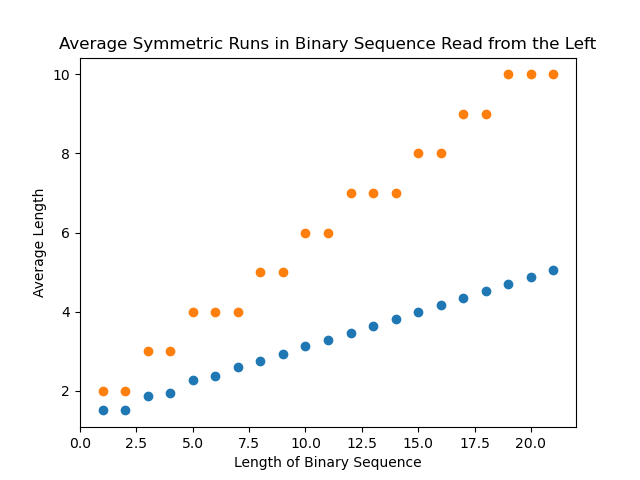

In [50]:
%matplotlib widget
import matplotlib.pyplot as plt

for base in range(2,3):
    x_vals = []
    avg_vals = []
    max_vals = []
    for n in range(1, 22): 
        x_vals.append(n)
        # avg_vals.append(avg_runs_from_left(n))
        freq = avg_runs_from_left(n,base)
        # avg_vals.append(get_average_from_freq(freq))
        max_vals.append(get_max_from_freq(freq))
        # print(f"avg_runs_from_left({n}) = {avg_runs_from_left(n)}")
    print(f"base:{base} avgs:{avg_vals}")
    print(f"base:{base} maxs:{max_vals}")
    # plt.scatter(x_vals,avg_vals)
    plt.scatter(x_vals,max_vals)

# plt.scatter(x_vals,avg_vals)
# plt.scatter(x_vals,max_vals)
plt.title("Average Symmetric Runs in Binary Sequence Read from the Left")
# plt.title("Maximum Symmetric Runs in Binary Sequence Read from the Left")
plt.xlabel("Length of Binary Sequence")
plt.ylabel("Average Length")
plt.show()

In [51]:
# print(f"Secant line for average vals is {(avg_vals[-1] - avg_vals[0])/(len(avg_vals))}")
print(f"Secant line for maximum vals is {(max_vals[-1] - max_vals[0])/(len(max_vals))}")

Secant line for maximum vals is 0.38095238095238093


In [27]:
for i in range(1,len(avg_vals)):
    print(f"avg_val[i]/(i+1) = {avg_vals[i]/(i+1)}")
    # print(f"max_val[i]/(i+1) = {max_vals[i]/(i+1)}")

avg_val[i]/(i+1) = 0.75
avg_val[i]/(i+1) = 0.625
avg_val[i]/(i+1) = 0.484375
avg_val[i]/(i+1) = 0.45625
avg_val[i]/(i+1) = 0.3932291666666667
avg_val[i]/(i+1) = 0.3705357142857143
avg_val[i]/(i+1) = 0.3447265625
avg_val[i]/(i+1) = 0.3263888888888889
avg_val[i]/(i+1) = 0.3119140625
avg_val[i]/(i+1) = 0.29918323863636365
avg_val[i]/(i+1) = 0.2892049153645833
avg_val[i]/(i+1) = 0.2799635667067308
avg_val[i]/(i+1) = 0.27295357840401785
avg_val[i]/(i+1) = 0.2660746256510417
avg_val[i]/(i+1) = 0.26051998138427734
avg_val[i]/(i+1) = 0.2553832110236673
avg_val[i]/(i+1) = 0.25091997782389325
avg_val[i]/(i+1) = 0.24688540006938733
avg_val[i]/(i+1) = 0.24325671195983886
avg_val[i]/(i+1) = 0.2399905068533761


In [6]:
for i in range(len(avg_vals)): print(max_vals[i]/avg_vals[i]) # about 2 every time

1.5
1.7142857142857142
1.5211267605633803
1.6265060240963856
2.046931407942238
1.837594526467411
1.926235825167896


In [24]:
# examining structure of maximum left symmetric runs
base = 2
for length in range(2, 20):
    freq_dict = each_run_from_left(length, base)
    max = -1
    for key in freq_dict:
        if key > max: max = key

    # https://oeis.org/A011656 for n cong to 4 mod 7 gf: (x^2 + x^4 + x^5 + x^6)/(1-x^7)
    # for n cong to 6 mod 7 gf: (x^2 + x^3 + x^5)/(1-x^7)

    #if len(freq_dict[max]) == 1:
    # if length %7 == 1:
    print(f"length: {length} max:{max} len(dict): {len(freq_dict[max])}") 
    for seq in freq_dict[max]:
        print(seq)

length: 2 max:2 len(dict): 1
[0, 1]
length: 3 max:2 len(dict): 2
[0, 0, 1]
[0, 1, 1]
length: 4 max:3 len(dict): 1
[0, 0, 1, 0]
length: 5 max:3 len(dict): 3
[0, 0, 0, 1, 0]
[0, 0, 1, 1, 0]
[0, 1, 0, 0, 1]
length: 6 max:4 len(dict): 1
[0, 0, 1, 1, 0, 1]
length: 7 max:4 len(dict): 4
[0, 0, 0, 1, 1, 0, 1]
[0, 0, 1, 0, 1, 1, 0]
[0, 0, 1, 1, 1, 0, 1]
[0, 1, 0, 1, 1, 0, 1]
length: 8 max:4 len(dict): 14
[0, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 1, 0, 1, 1, 0]
[0, 0, 0, 1, 1, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 0, 1]
[0, 0, 1, 0, 1, 1, 0, 0]
[0, 0, 1, 0, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 1, 1, 0, 1, 0, 1]
[0, 0, 1, 1, 1, 0, 1, 1]
[0, 0, 1, 1, 1, 1, 0, 1]
[0, 1, 0, 0, 0, 1, 1, 0]
[0, 1, 0, 1, 1, 0, 0, 1]
[0, 1, 0, 1, 1, 1, 0, 1]
[0, 1, 1, 0, 0, 0, 1, 0]
length: 9 max:5 len(dict): 4
[0, 0, 0, 1, 1, 0, 0, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 0, 1]
[0, 1, 0, 0, 0, 1, 1, 0, 1]
[0, 1, 0, 1, 1, 0, 0, 1, 0]
length: 10 max:5 len(dict): 12
[0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 1, 1, 0

In [8]:
'''
remainder:

0 [0] + a
1 a  
2 a + [0,1]
3 a 
4 b
5 a
6 a

[0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0]



'''



# sequences a and b, as well as [0]+a and a+[0,1] can be truncated 
a = [0] + [0,0,1,1,0,1,0] + [0,0,1,1,0,1,0] + [0,0,1,1,0,1,0]
b = [0,0,1,0,1,1,1] + [0,0,1,0,1,1,1] + [0,0,1,0,1,1,1]
# a and b covers all n but 0 and 2 mod 7
# can cover 0 with [0] + a 
# can cover 2 with a + [0,1]
truth = [1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10, 10, 10]

for i in range(len(a)):
    a_seq = a[:i+1]
    b_seq = b[:i+1]
    a_val = from_left(a_seq)[0]
    b_val = from_left(b_seq)[0]
    if a_val == truth[i]: print(f"index: {i+1} remainder: {(i+1)%7} a: {a_seq} ")
    elif b_val == truth[i]: print(f"index: {i+1} remainder: {(i+1)%7} b: {b_seq} ")


index: 1 remainder: 1 a: [0] 
index: 3 remainder: 3 b: [0, 0, 1] 
index: 4 remainder: 4 b: [0, 0, 1, 0] 
index: 7 remainder: 0 a: [0, 0, 0, 1, 1, 0, 1] 
index: 8 remainder: 1 b: [0, 0, 1, 0, 1, 1, 1, 0] 
index: 10 remainder: 3 b: [0, 0, 1, 0, 1, 1, 1, 0, 0, 1] 
index: 11 remainder: 4 b: [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0] 
index: 14 remainder: 0 a: [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1] 
index: 15 remainder: 1 b: [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0] 
index: 17 remainder: 3 b: [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1] 
index: 18 remainder: 4 b: [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0] 
index: 21 remainder: 0 a: [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1] 


In [16]:
from math import floor
# evidence for "there are only three repeating sequences with the same profile that achieve a 3/7 density"

base = 2
max = 0
for n in range(1,22):
    lst = []
    for i in range(base**n): 
        seq = base_to_list(i,n,base)
        if seq[0] == 0:
            val_1 = from_left(seq)
            uh = []
            for tup in val_1[1]:
                uh.append((tup[0]+n,tup[1]+n))
            val_2 = from_left(seq+seq)
            if val_1[1]+uh == val_2[1] and val_1[0]/n >= max:
                print(f"length: {n} val_1: {val_1[0]} seq: {seq}")
                max = val_1[0]/n

length: 7 val_1: 3 seq: [0, 0, 1, 1, 0, 1, 0]
length: 7 val_1: 3 seq: [0, 1, 0, 0, 0, 1, 1]
length: 7 val_1: 3 seq: [0, 0, 1, 0, 1, 1, 1]
length: 14 val_1: 6 seq: [0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]
length: 14 val_1: 6 seq: [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]
length: 14 val_1: 6 seq: [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]
length: 21 val_1: 9 seq: [0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]
length: 21 val_1: 9 seq: [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]
length: 21 val_1: 9 seq: [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]


In [6]:
from math import floor
# evidence for there are no length 1 symmetric runs in the middle

base = 2
max = 0
for n in range(1,22):
    print(f'{n}___________________________________________')
    max_profile(n)

1___________________________________________
[0]   [1]
2___________________________________________
[0, 1]   [1, 1]
3___________________________________________
[0, 0, 1]   [2, 1]
[0, 1, 1]   [1, 2]
4___________________________________________
[0, 0, 1, 0]   [2, 1, 1]
5___________________________________________
[0, 0, 0, 1, 0]   [3, 1, 1]
[0, 0, 1, 1, 0]   [2, 2, 1]
[0, 1, 0, 0, 1]   [3, 1, 1]
6___________________________________________
[0, 0, 1, 1, 0, 1]   [2, 2, 1, 1]
7___________________________________________
[0, 0, 1, 0, 1, 1, 0]   [2, 3, 1, 1]
[0, 0, 0, 1, 1, 0, 1]   [3, 2, 1, 1]
[0, 1, 0, 1, 1, 0, 1]   [3, 2, 1, 1]
[0, 0, 1, 1, 1, 0, 1]   [2, 3, 1, 1]
8___________________________________________
[0, 0, 1, 1, 0, 1, 0, 0]   [2, 2, 3, 1]
[0, 0, 1, 0, 1, 1, 0, 0]   [2, 3, 1, 2]
[0, 1, 1, 0, 0, 0, 1, 0]   [4, 2, 1, 1]
[0, 1, 0, 0, 0, 1, 1, 0]   [3, 2, 2, 1]
[0, 0, 0, 1, 0, 1, 1, 0]   [3, 3, 1, 1]
[0, 0, 1, 0, 1, 1, 1, 0]   [2, 3, 2, 1]
[0, 0, 0, 1, 1, 0, 0, 1]   [3, 2, 2, 1]
[0, 1